### Required Imports


In [1]:
import sys
import os
sys.path.insert(0, 'core/')
from analysis import create_denoising_dataset
import nibabel as nib, scipy.io as sio
from utils import list_to_nib
from tkinter import Tk
from tkinter.filedialog import askdirectory

### Set Path for Files

In [2]:
Tk().withdraw() #hide tk root window
# user specify data directory
mainpath = askdirectory(title = 'Path to Phantom Data') #how to notify user what folder to select; in the README? 

# make output directory
outpath = mainpath + '/Extracted Time Series'
os.makedirs(outpath, exist_ok = True)

In [3]:
# set path for input files 
epi_path = mainpath + '/epi/epi_corrected.nii' # Path of intensity nonuniformity corrected fMRI measurement in nifti format.
log_path = mainpath + '/epi/log.csv' # Path of phantom-log file obtained from your BrainDancer device.
acqtimes_path = mainpath + '/Acqtimes.csv' # Path of slice-acquistion order of your acquistion protocol in csv format.

In [4]:
# set path for output files
ground_truth_ts = outpath + '/groundtruth.nii' # Path for saving the ground truth.
measured_fmri_ts = outpath + '/measured.nii' # Path for saving the extracted measured fMRI time series. 
masks = outpath + '/masks.nii' # Path for saving masks of the extracted slices. 
center_rotation = outpath + '/center.mat' # Path for saving the center of rotation used for creating ground-truth. 
slices = outpath + '/slices.mat' # Path for saving a log of slices used for ground-truth and measured fMRI time series. 

### Run the Extraction 

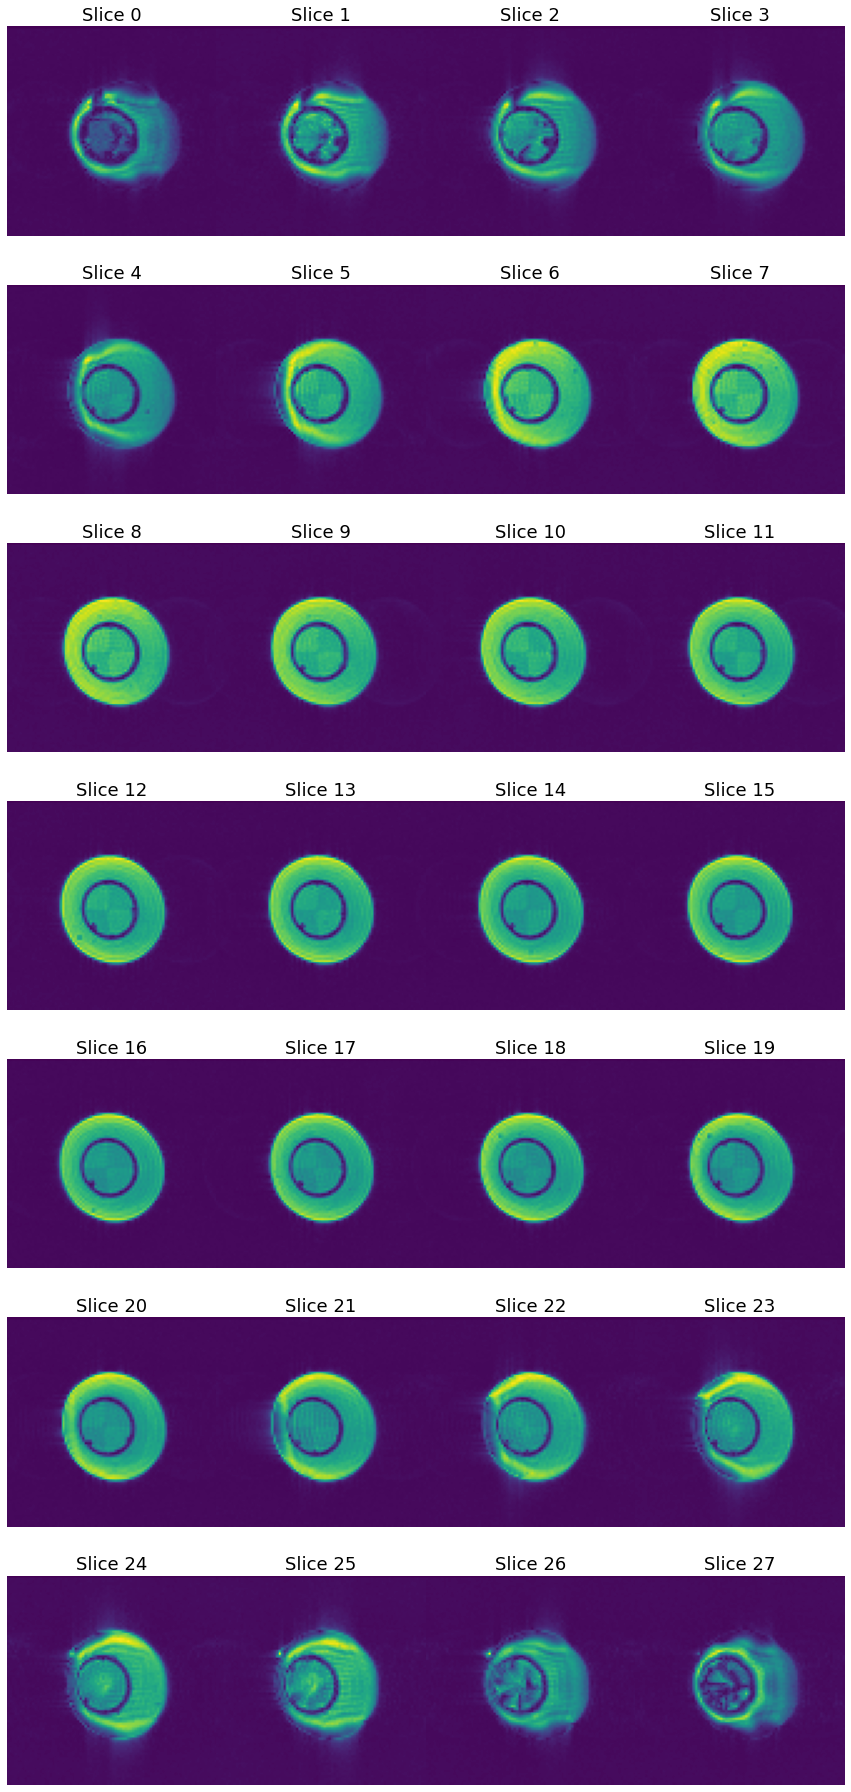

Enter the first good slice:  8
Enter the last good slice:  14


Selected Slices for Analysis are:  [11, 13, 8, 10, 12]


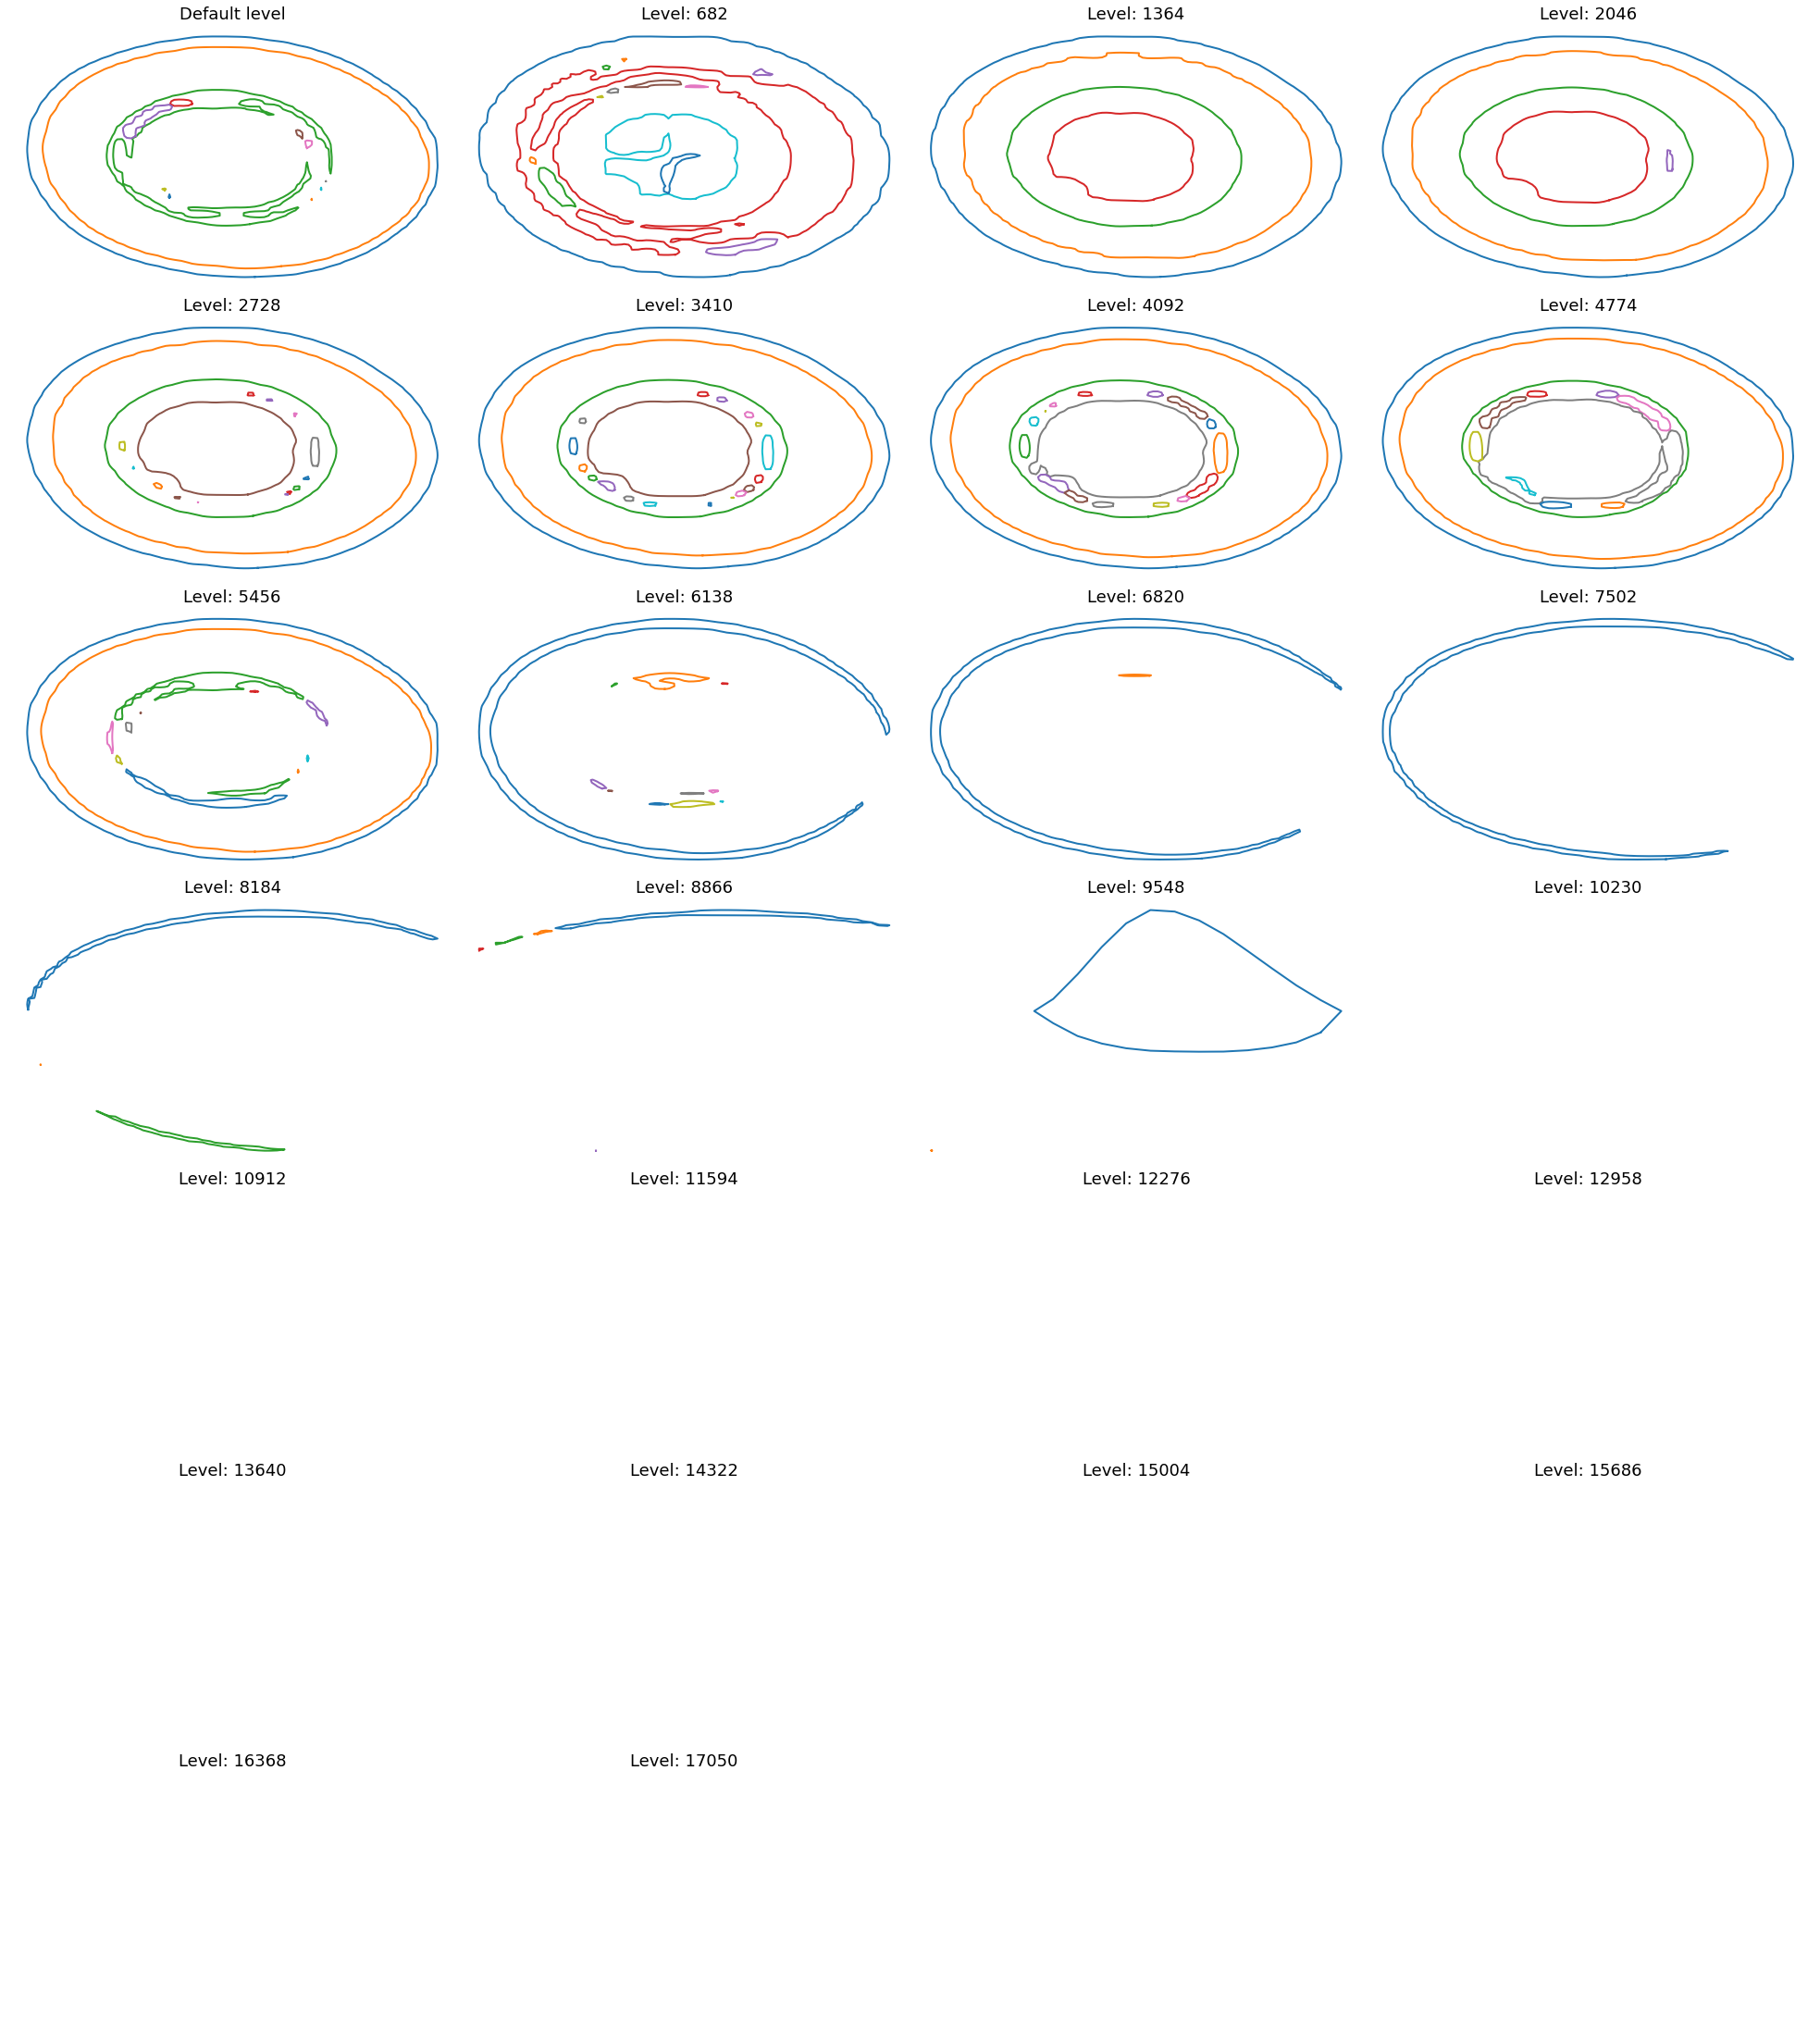

If none of the plots show clear circles, you need to choose different scaling factor and edge filter to find contours again. Fail to detect clear circuit will cause error in the subsequent estimation


Do you want to repeat and change the values? 1 for yes, 0 for no 2728


The current filter is sobel


Enter the new filter (string); choose from 'sobel','scharr','prewitt' sobel


The current scaling factor is 2


Enter the new scaling (float); recommended range (1~3) 2


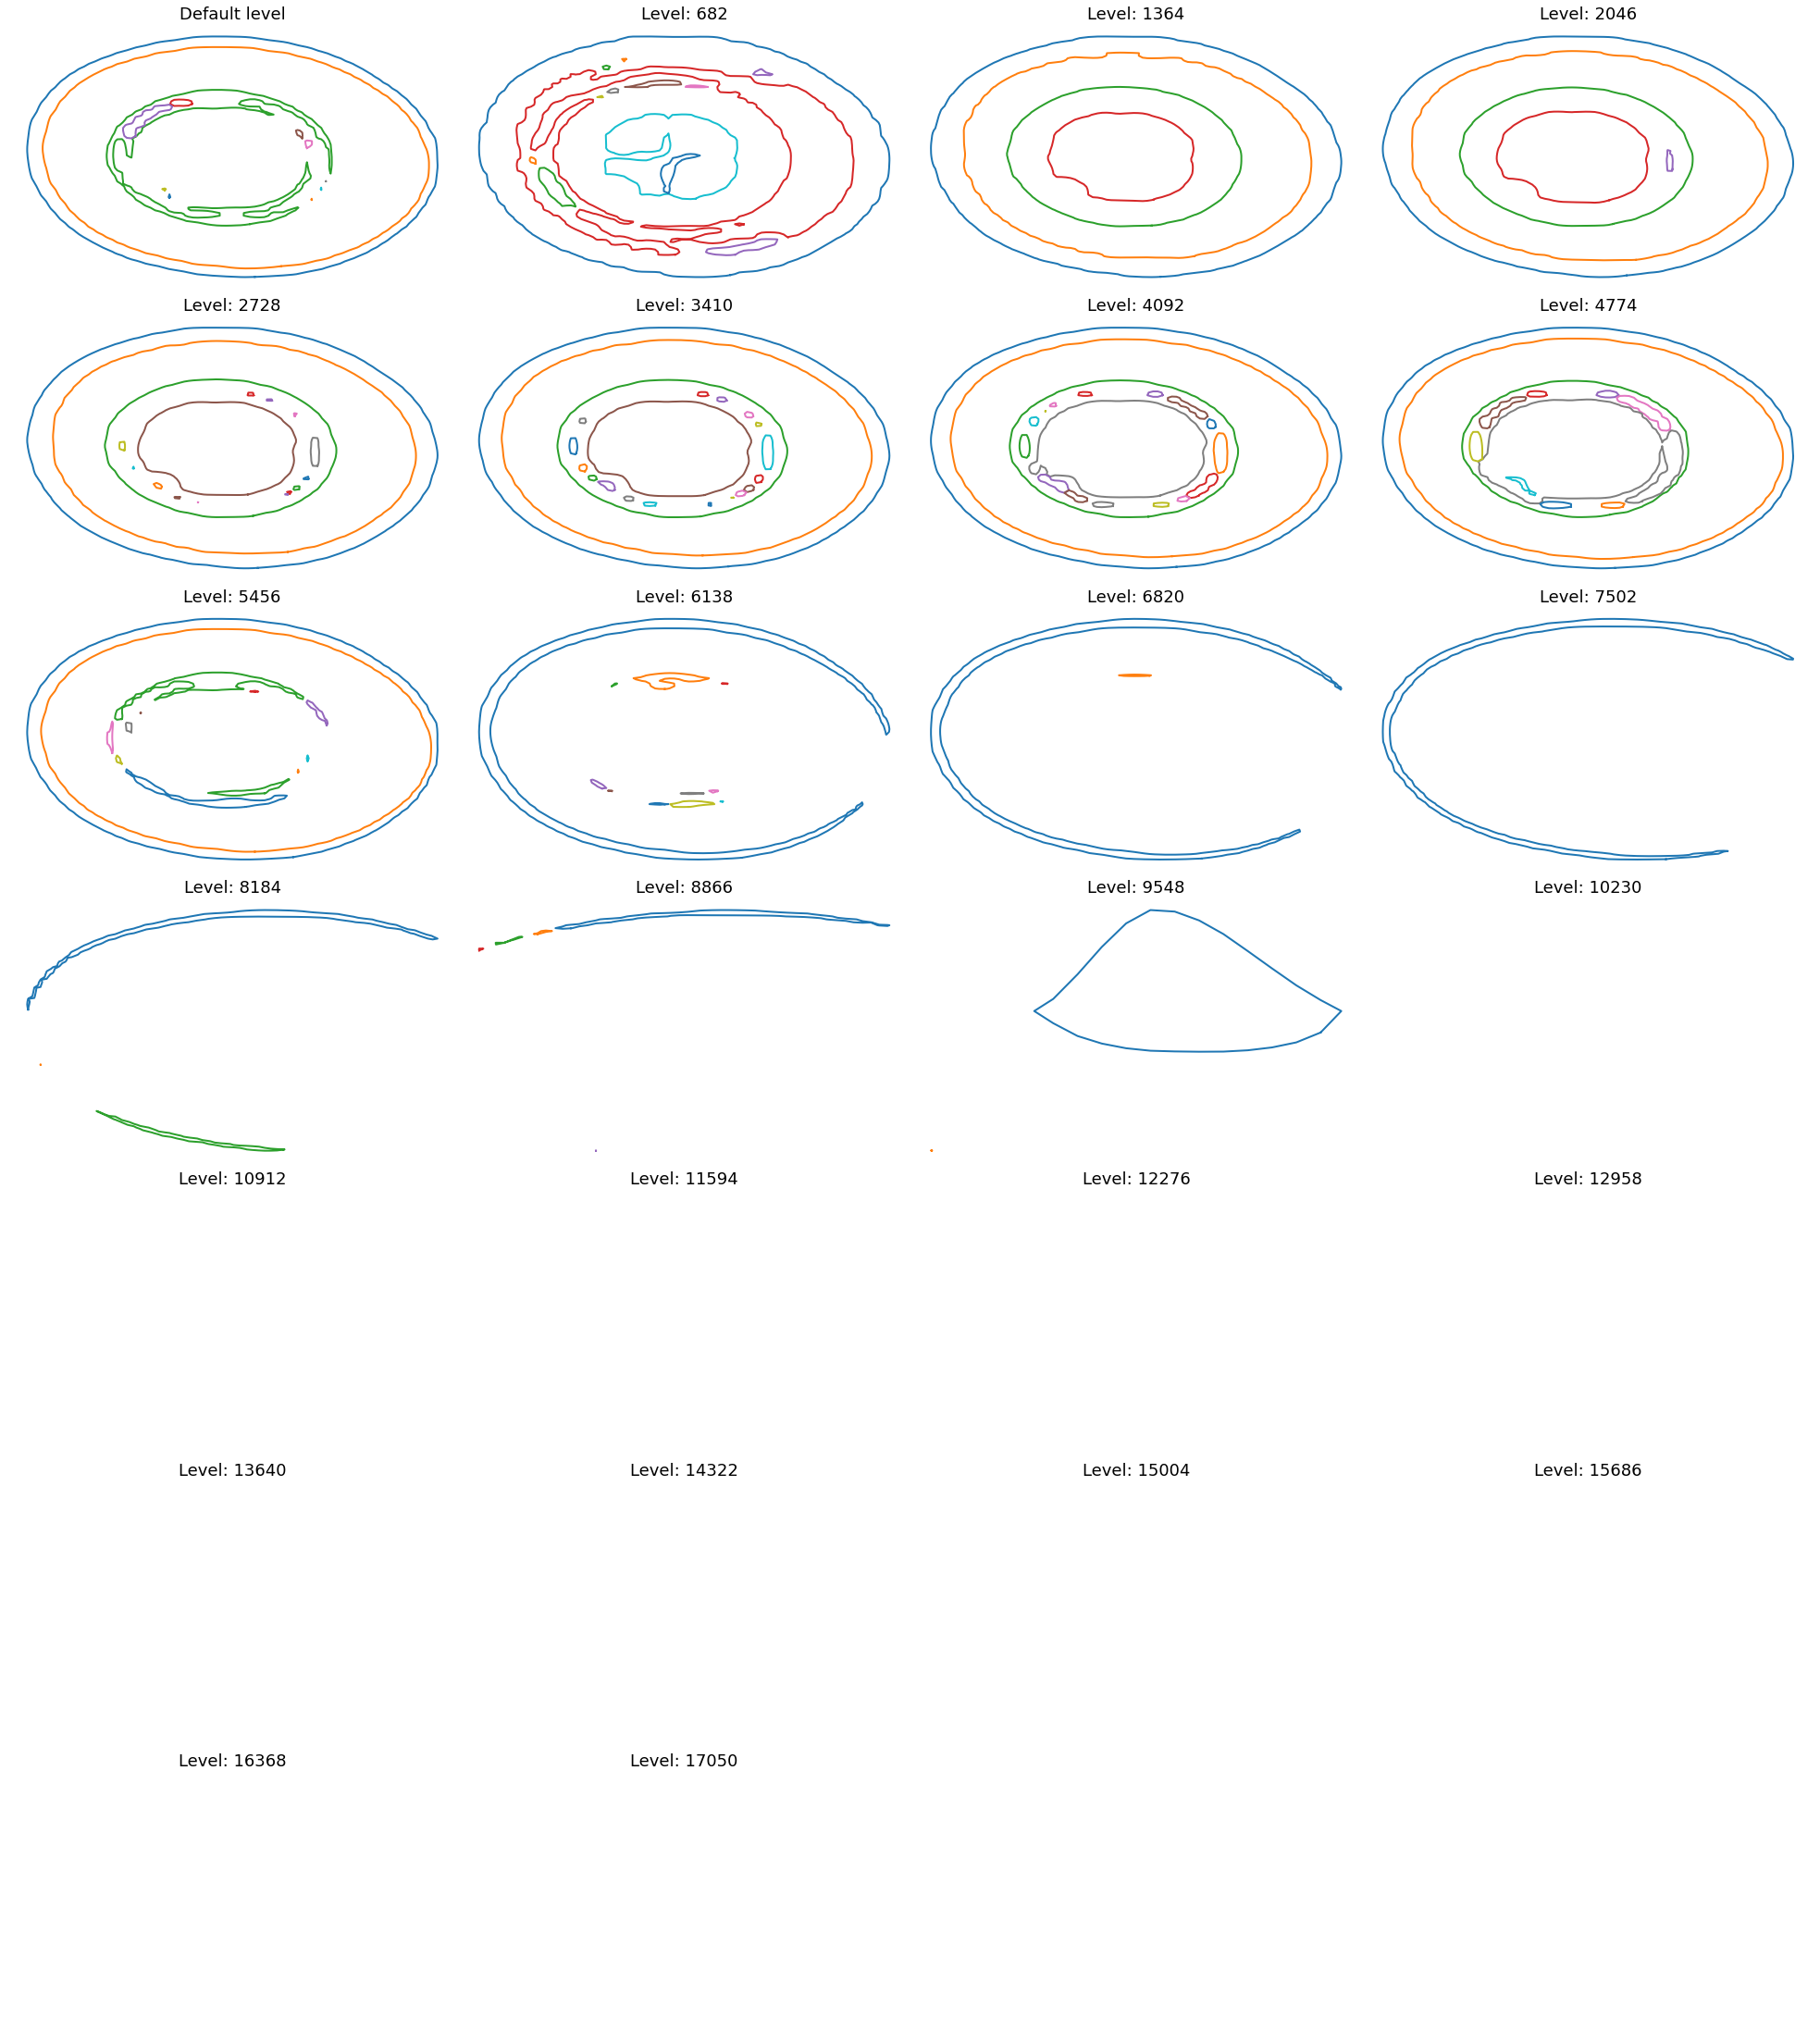

If none of the plots show clear circles, you need to choose different scaling factor and edge filter to find contours again. Fail to detect clear circuit will cause error in the subsequent estimation


Do you want to repeat and change the values? 1 for yes, 0 for no 0
Which level value results in clear circles? 2728


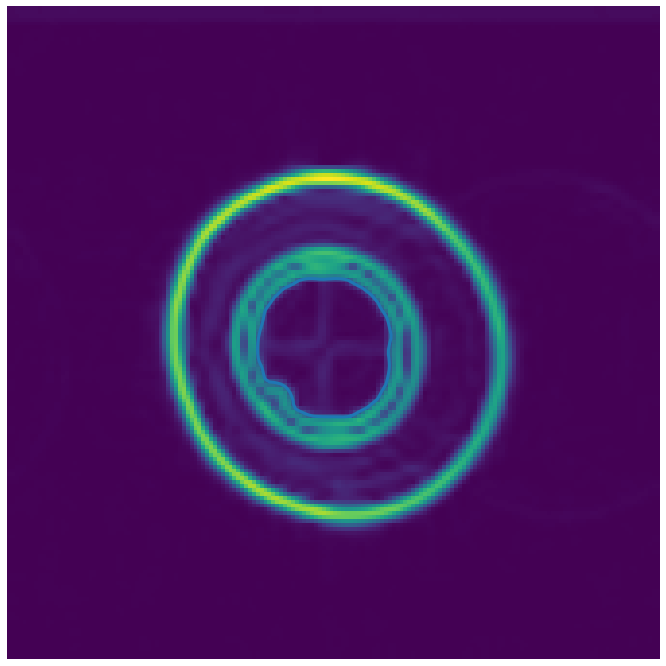

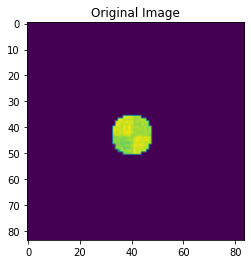

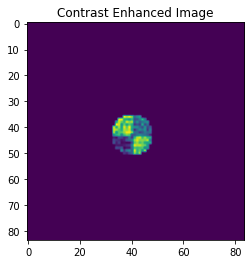

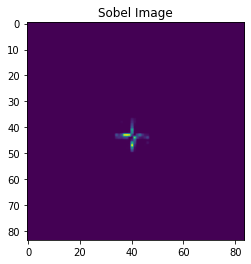

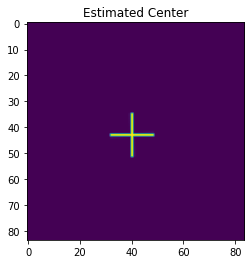

COR,COC 43 40


Enter 1 if this slice is good 1


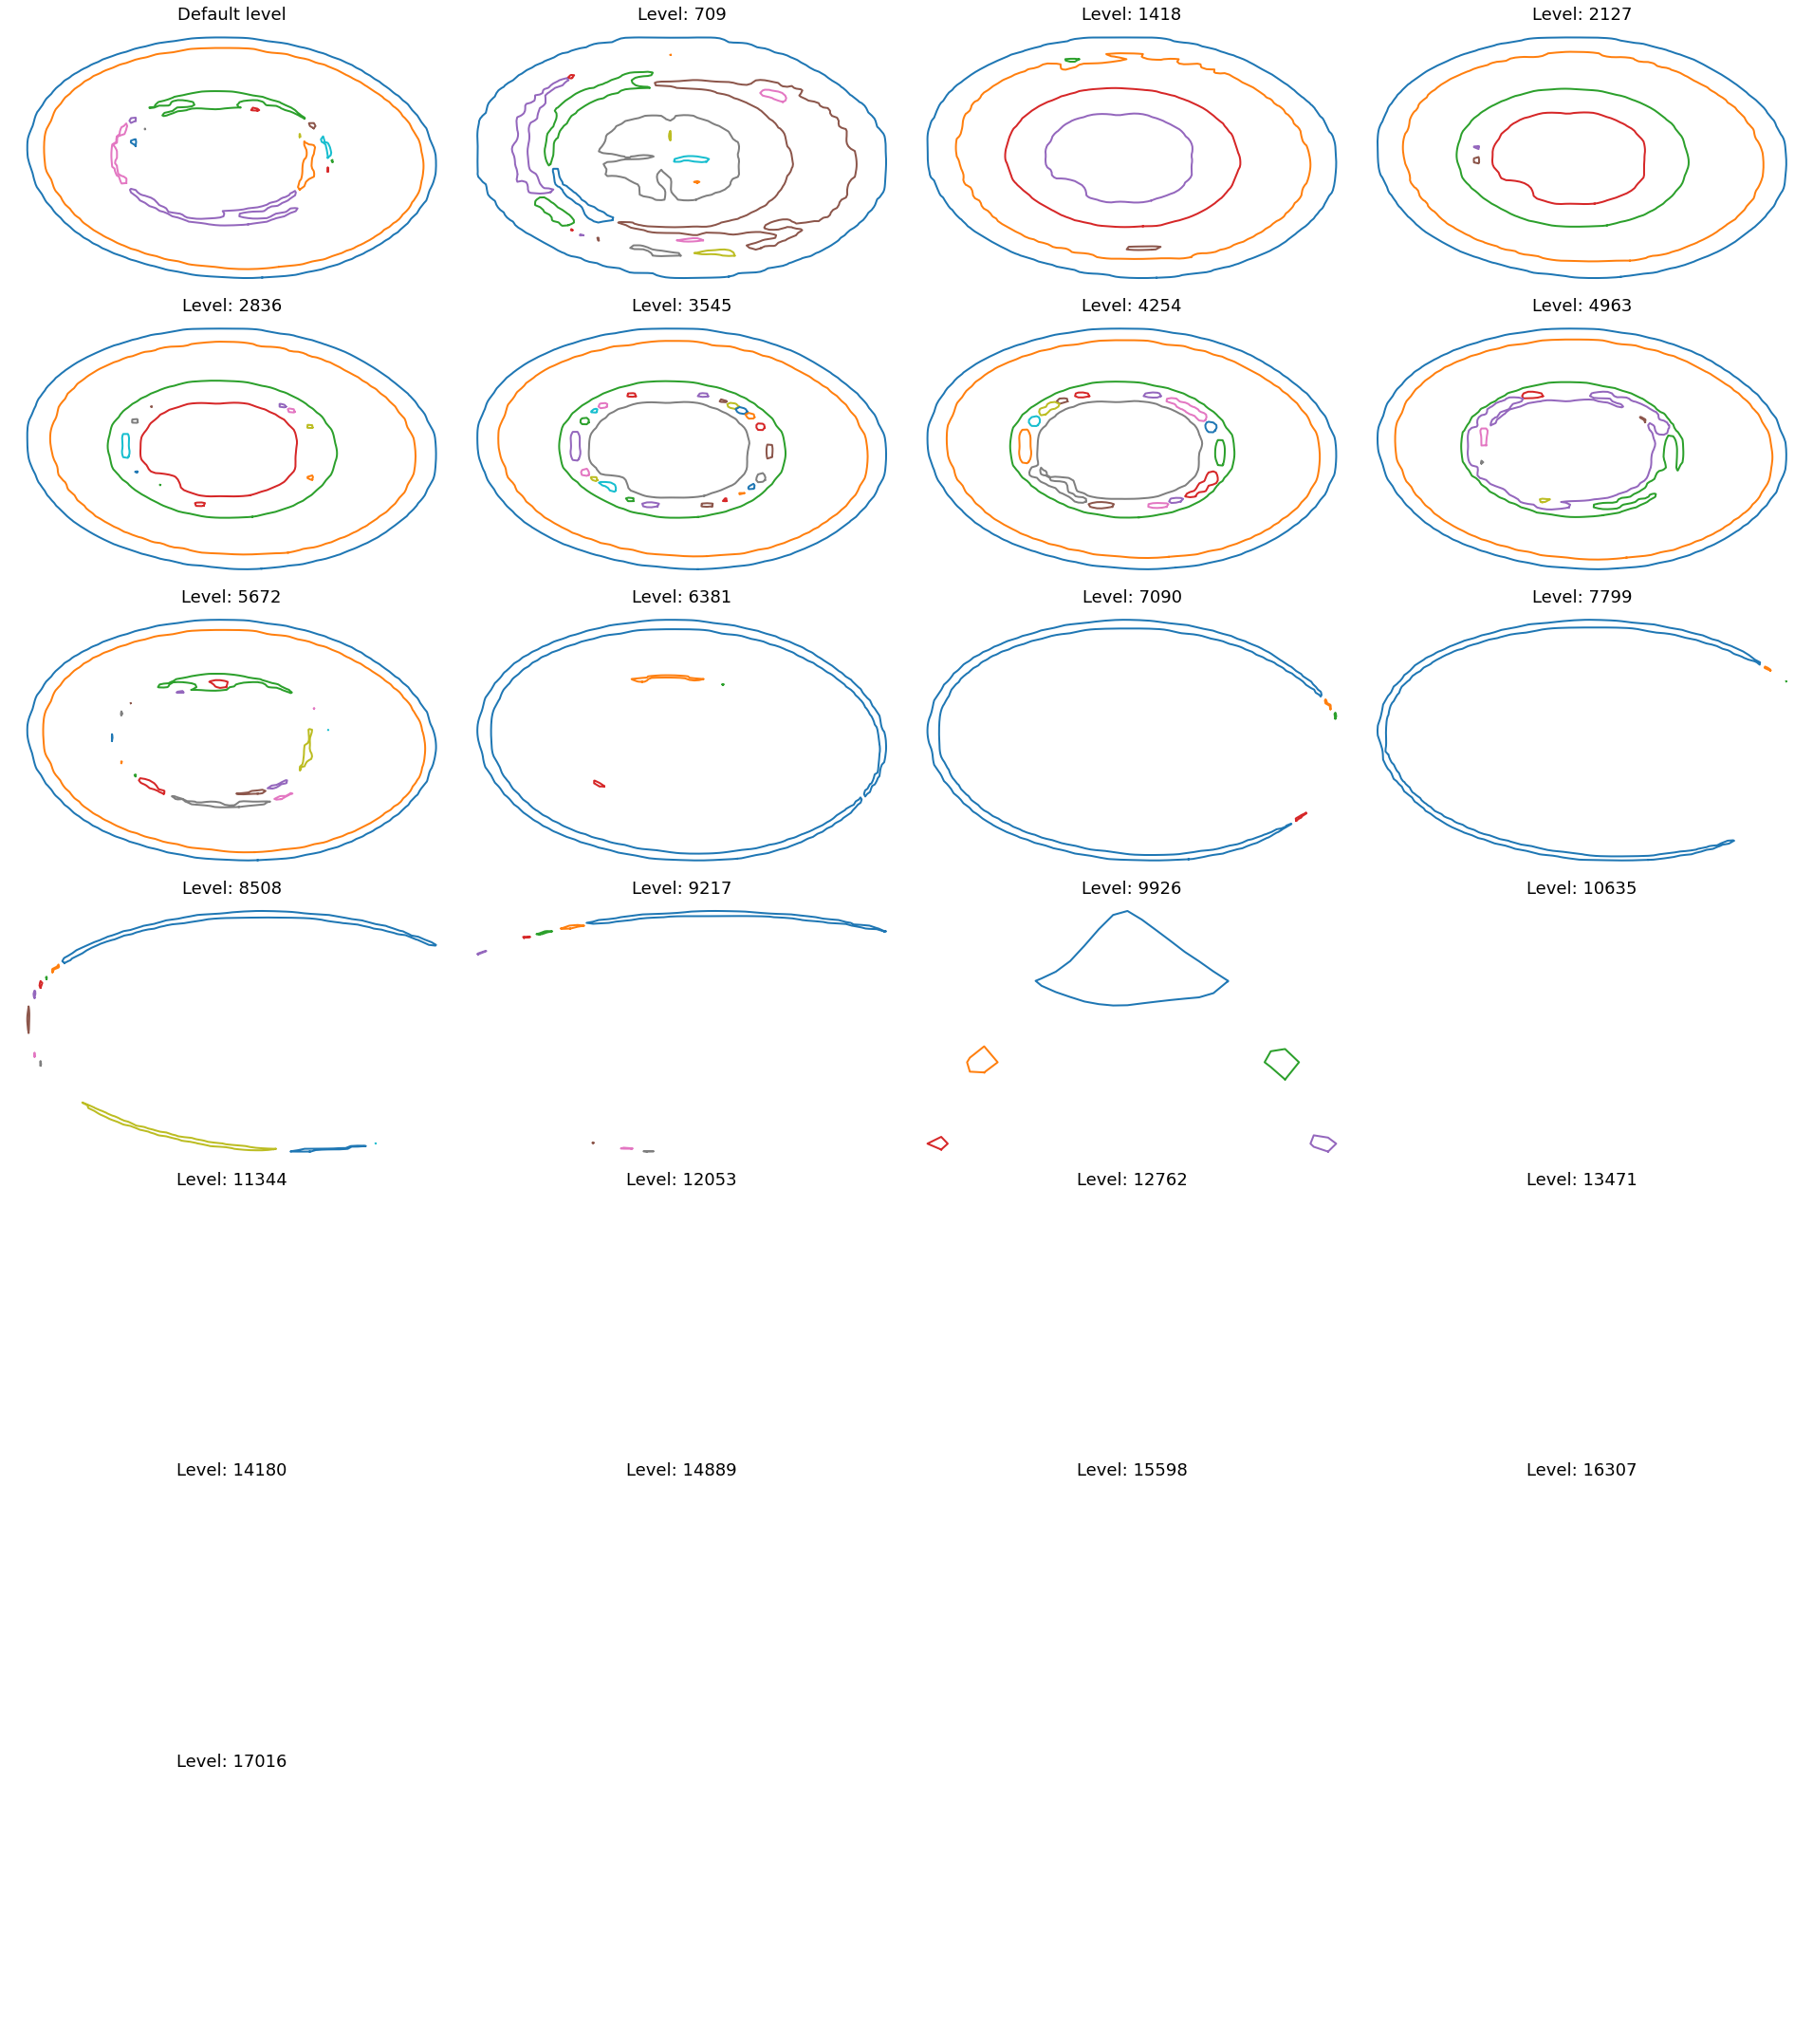

If none of the plots show clear circles, you need to choose different scaling factor and edge filter to find contours again. Fail to detect clear circuit will cause error in the subsequent estimation


KeyboardInterrupt: Interrupted by user

In [5]:
ground_truth, measured_fmri, imask, center, all_slices = create_denoising_dataset(epi_path,log_path,acqtimes_path,rot_dir=-1)

### Save the Results

In [6]:
nib.save(ground_truth,ground_truth_ts)
nib.save(measured_fmri,measured_fmri_ts)
nib.save(list_to_nib(imask,ground_truth.affine),masks)
sio.savemat(center_rotation,{'center':center}) 
sio.savemat(center_rotation,{'slices':all_slices})